# Data Preprocessing And Feature Engineering In Machine Learning 



In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

### A. Load the Dataset

In [3]:
df = pd.read_csv("adult_with_headers.csv")
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Basic Exploration

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [5]:
print(df.describe())

                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [6]:
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


### Handle Missing Values

In [7]:
df.replace(" ?", np.nan, inplace=True)

In [8]:
# Separate categorical and numerical columns
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [10]:
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [11]:
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [12]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

#### Apply Scaling Techniques

In [13]:
# Extract numerical columns
num_df = df[num_cols]

## A. Standard Scaling

In [15]:
standard_scaler = StandardScaler()
data_standard_scaled = standard_scaler.fit_transform(num_df)
data_standard_scaled = pd.DataFrame(data_standard_scaled, columns=num_cols)

## B. Min-Max Scaling 

In [16]:
minmax_scaler = MinMaxScaler()
data_minmax_scaled = minmax_scaler.fit_transform(num_df)
data_minmax_scaled = pd.DataFrame(data_minmax_scaled, columns=num_cols)

## Display example comparison

In [17]:
data_minmax_scaled

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


In [18]:
data_standard_scaled

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225


In [20]:
cat_cols = df.select_dtypes(include='object').columns
list(cat_cols)

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

## TASK 2. Encoding Techniques:

# ●	Apply One-Hot Encoding to categorical variables with less than 5 categories.
# ●	Use Label Encoding for categorical variables. Data Exploration and Preprocessing
# ●	Load the dataset and conduct basic data exploration (summary statistics, missing values, data types)
# ●	less with more than 5 categories
# ●	Discuss the pros and cons of One-Hot Encoding and Label Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder

In [23]:
#Check number of unique categories for each categorical feature
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")

workclass: 8 unique values
education: 16 unique values
marital_status: 7 unique values
occupation: 14 unique values
relationship: 6 unique values
race: 5 unique values
sex: 2 unique values
native_country: 41 unique values
income: 2 unique values


#### One-Hot Encoding → categorical columns with <=5 categories

In [25]:
low_cardinality_cols = [col for col in cat_cols if df[col].nunique() <= 5]

#### Label Encoding → categorical columns with >5 categories

In [26]:
high_cardinality_cols = [col for col in cat_cols if df[col].nunique() > 5]

In [27]:
low_cardinality_cols

['race', 'sex', 'income']

In [28]:
high_cardinality_cols

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'native_country']

#### ---- One-Hot Encoding ----

In [30]:
data_onehot = pd.get_dummies(df[low_cardinality_cols], drop_first=True)

#### ---- Label Encoding ----

In [31]:
le = LabelEncoder()
data_label = df[high_cardinality_cols].apply(le.fit_transform)

#### Combine encoded categorical data with numerical features

In [34]:
num_df = df.select_dtypes(include=['int64', 'float64'])
encoded_data = pd.concat([num_df, data_onehot, data_label], axis=1)

In [35]:
encoded_data.shape

(32561, 18)

In [36]:
encoded_data   

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K,workclass,education,marital_status,occupation,relationship,native_country
0,39,77516,13,2174,0,40,False,False,False,True,True,False,6,9,4,0,1,38
1,50,83311,13,0,0,13,False,False,False,True,True,False,5,9,2,3,0,38
2,38,215646,9,0,0,40,False,False,False,True,True,False,3,11,0,5,1,38
3,53,234721,7,0,0,40,False,True,False,False,True,False,3,1,2,5,0,38
4,28,338409,13,0,0,40,False,True,False,False,False,False,3,9,2,9,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,False,False,False,True,False,False,3,7,2,12,5,38
32557,40,154374,9,0,0,40,False,False,False,True,True,True,3,11,2,6,0,38
32558,58,151910,9,0,0,40,False,False,False,True,False,False,3,11,6,0,4,38
32559,22,201490,9,0,0,20,False,False,False,True,True,False,3,11,4,0,3,38


## 3. Feature Engineering:

#### ●	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.
#### ●	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

### Create New Features

In [40]:
df.columns.tolist()

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income']

### Feature 1: "work_hours_category"

In [44]:
# Categorize people based on their weekly working hours
df['work_hours_category'] = pd.cut(
    df['hours_per_week'],
    bins=[0, 25, 40, 60, 100],
    labels=['Part-time', 'Full-time', 'Overtime', 'Extreme']
)

###  Feature 2: "Capital difference"

In [48]:
df['capital_diff'] = df['capital_gain'] - df['capital_loss']     # update name


In [49]:
print(df.columns.tolist())

['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income', 'work_hours_category', 'capital_diff']


### Clean column names for consistency

In [51]:
df.columns = df.columns.str.strip().str.lower().str.replace('-', '_').str.replace(' ', '_')

In [52]:
print(df[['hours_per_week', 'work_hours_category', 'capital_gain', 'capital_loss', 'capital_diff']].head())

   hours_per_week work_hours_category  capital_gain  capital_loss  \
0              40           Full-time          2174             0   
1              13           Part-time             0             0   
2              40           Full-time             0             0   
3              40           Full-time             0             0   
4              40           Full-time             0             0   

   capital_diff  
0          2174  
1             0  
2             0  
3             0  
4             0  


#  Rationale:


### 1.work_hours_category:
####     - Converts continuous 'hours-per-week' into interpretable categories.
####     - Helps the model capture non-linear patterns in working hours and income.
####     - Example: Someone working 20 hrs/week is very different from 60 hrs/week.

### 2.capital_diff:
####     - Represents overall capital investment behavior.
####     - Combines gain and loss into a single meaningful metric.
###     - High 'capital_diff' likely correlates with higher income bracket.

In [55]:
# Check skewness of all numerical features
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
skew_values = df[num_cols].skew().sort_values(ascending=False)

In [56]:
skew_values

capital_gain      11.953848
capital_diff      11.871934
capital_loss       4.594629
fnlwgt             1.446980
age                0.558743
hours_per_week     0.227643
education_num     -0.311676
dtype: float64

In [57]:
df.columns.tolist()

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income',
 'work_hours_category',
 'capital_diff']

#### Normalize column names (recommended fix)

In [58]:

df.columns = df.columns.str.strip().str.lower().str.replace('-', '_').str.replace(' ', '_')

#### Visualize the most skewed feature: 'capital-gain'

Text(0.5, 1.0, 'Before Log Transformation')

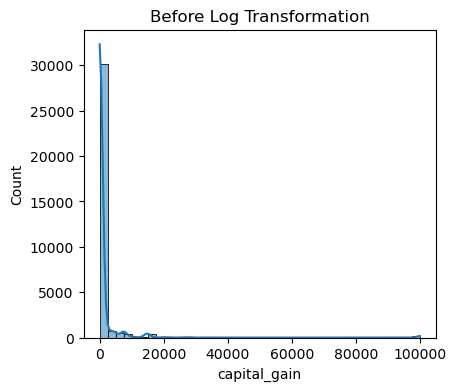

In [60]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df['capital_gain'], bins=40, kde=True)
plt.title("Before Log Transformation")

#### Apply log transformation

In [61]:
df['capital_gain_log'] = np.log1p(df['capital_gain'])

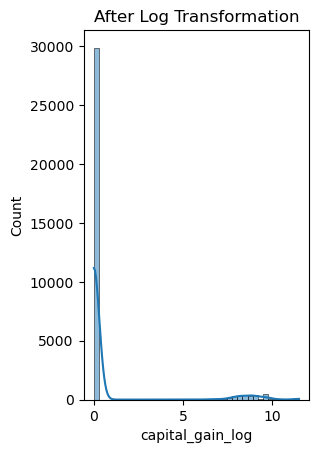

In [63]:
plt.subplot(1,2,2)
sns.histplot(df['capital_gain_log'], bins=40, kde=True)
plt.title("After Log Transformation")
plt.show()

### Check actual column names

In [64]:
df.columns.tolist()

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income',
 'work_hours_category',
 'capital_diff',
 'capital_gain_log']

### Rename the column to match final naming convention

In [65]:
df.rename(columns={'capital_gain_log': 'log_capital_gain'}, inplace=True)

####  Final Overview

In [66]:
print("\nFinal columns created:")
print(['work_hours_category', 'capital_diff', 'log_capital_gain'])

print("\nSample of final engineered features:")
display(df[['work_hours_category', 'capital_diff', 'capital_gain', 'log_capital_gain']].head())


Final columns created:
['work_hours_category', 'capital_diff', 'log_capital_gain']

Sample of final engineered features:


,work_hours_category,capital_diff,capital_gain,log_capital_gain
0,Full-time,2174,2174,7.684784
1,Part-time,0,0,0.000000
2,Full-time,0,0,0.000000
3,Full-time,0,0,0.000000
4,Full-time,0,0,0.000000
